In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
df_train = pd.read_csv("../input/train.csv").sample(frac=1)
df_test = pd.read_csv("../input/test.csv")

In [3]:
print('Size training set {}, size test set {}\n'.format(df_train.shape, df_test.shape))
print('Featues: {}'.format(df_train.columns[(df_train.columns != 'Id') & (df_train.columns != 'Cover_Type')]))

Size training set (15120, 56), size test set (565892, 55)

Featues: Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type3

<Container object of 40 artists>

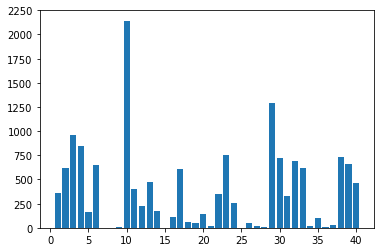

In [6]:
columns = ['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
df = df_train.copy()[columns]
y = df.astype(bool).sum(axis=0)
x = np.arange(1, len(columns)+1)
plt.bar(x, y)

<Container object of 40 artists>

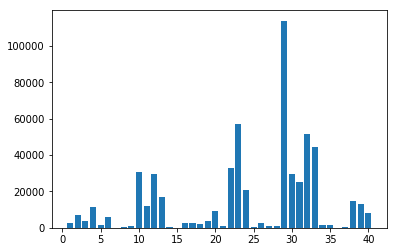

In [7]:
df = df_test.copy()[columns]
y = df.astype(bool).sum(axis=0)
x = np.arange(1, len(columns)+1)
plt.bar(x, y)

In [8]:
if True:
    rubbly = ['Soil_Type' + str(num) for num in [3, 4, 5, 10, 11, 13]]
    stony  = ['Soil_Type' + str(num) for num in [6, 12]]
    very_stony = ['Soil_Type' + str(num) for num in [9, 18, 26, 2]]
    extemely_stony =['Soil_Type' + str(num) for num in [1, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36]]
    rock_land_complex = ['Soil_Type' + str(num) for num in [11, 12, 34, 40]]
    typic_cryaquolls_complex = ['Soil_Type' + str(num) for num in [20, 23]]
    rock_outcrop_complex = ['Soil_Type' + str(num) for num in [1, 3, 4, 5, 6, 10, 27, 28 , 33]]
    leighcan_family_complex = ['Soil_Type' + str(num) for num in [32, 39]]
    leighcan = ['Soil_Type' + str(num) for num in [22, 23, 24, 25, 27, 28, 31]]
    moran = ['Soil_Type' + str(num) for num in [39, 40]]

    categories = [rubbly, stony, very_stony, extemely_stony, rock_land_complex, typic_cryaquolls_complex,
                  rock_outcrop_complex, leighcan_family_complex, leighcan, moran]

    cat_num = 0
    for cat in categories:
        cat_str = 'cat' + str(cat_num)
        df_train[cat_str] = 0
        df_test[cat_str] = 0
        for soil_type in cat:
            df_train[cat_str] += df_train[soil_type]
            df_test[cat_str] += df_test[soil_type]
        cat_num += 1

In [61]:
scores = ['precision']

param_grid = { 
    'n_estimators': [150, 200, 250],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : range(10, 15, 1)
}

for score in scores:
    gsclf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='%s_macro' % score, n_jobs=4)
    gsclf.fit(X, y)
    print('Best params = {}'.format(gsclf.best_params_))
    print('Best score = {}'.format(gsclf.best_score_))

Best params = {'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 250}
Best score = 0.8347518060495598


In [62]:
y_pred_train = gsclf.predict(X)
confusion_matrix(y, y_pred_train)

array([[2008,   91,    2,    0,   25,    3,   31],
       [  79, 1965,   20,    0,   67,   28,    1],
       [   0,    2, 2004,   32,   10,  112,    0],
       [   0,    0,    1, 2148,    0,   11,    0],
       [   0,   19,   13,    0, 2119,    9,    0],
       [   0,    3,   21,   18,    6, 2112,    0],
       [  28,    0,    0,    0,    0,    0, 2132]])

In [ ]:
df_test = df_test.iloc[:, df_test.columns == 'Id']
df_test['Cover_Type'] = y_pred
df_test.to_csv('result.csv', index=False)